In [3]:
!pip install -U -q PyDrive

In [1]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive

In [2]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters

file_list = drive.ListFile(
    {'q': "'1JQBx5yivL8XheDCwDCCGnt0WkhhcKX7j' in parents"}).GetList()

print(file_list)

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(str(fname)))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

  

[GoogleDriveFile({'kind': 'drive#file', 'id': '1n1Y0TPhh8R9FgFLQ2IWChZn215-rZwft', 'etag': '"XufSKW3AtzM6Rz9G1XY9VWAnoL4/MTUzMDI5ODQwMTQ3OQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1n1Y0TPhh8R9FgFLQ2IWChZn215-rZwft', 'webContentLink': 'https://drive.google.com/a/unc.edu.ar/uc?id=1n1Y0TPhh8R9FgFLQ2IWChZn215-rZwft&export=download', 'alternateLink': 'https://drive.google.com/a/unc.edu.ar/file/d/1n1Y0TPhh8R9FgFLQ2IWChZn215-rZwft/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/a/unc.edu.ar/file/d/1n1Y0TPhh8R9FgFLQ2IWChZn215-rZwft/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'linear_regression_performance.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'createdDate': '2018-06-29T18:43:46.915Z', 'modifiedDate': '2018-06-29T18:53:21.479Z', 'modifiedByMeDate': '2018-06-29T18:43:46.915Z', 'lastViewedByMeDate': '2018-06-2

In [2]:
distribution_by_exercise = pd.read_csv('distribution_by_exercise.csv')
lr_performance = pd.read_csv('linear_regression_performance.csv')


In [13]:
distribution_by_exercise[distribution_by_exercise['exercise'].str.contains('plato')]

,Unnamed: 0,exercise,submission_amount,aborted,errored,failed,passed,passed_with_warnings,pending,running
281,42,El plato fuerte: fold,5697,0.01334,0.211515,0.705986,0.067404,0.00158,0.000176,0.0


In [3]:
lr_short = lr_performance[['exercise', 'precision', 'recall', 'f1-score', 'submission_amount']]
lr_short.sort_values('precision', ascending=False)

,exercise,precision,recall,f1-score,submission_amount
39,"Gran poder, gran responsalibidad",1.00,1.00,1.00,2
24,Alto en el camino: sinónimos de tipo,0.94,0.94,0.93,309
182,Los números,0.90,0.89,0.88,3143
188,Más valores,0.89,0.88,0.87,3541
30,No todo los que brilla...,0.88,0.88,0.85,386
71,aprobaron,0.88,0.90,0.88,754
153,Tipando constantes,0.87,0.86,0.86,2308
96,"Un Saludo Superior, Parte 4",0.86,0.88,0.86,1135
79,tipos-02,0.86,0.87,0.85,816
181,Un poco más de inferencia,0.86,0.86,0.84,3112


In [10]:
lr_short['submission_amount_log'] = np.log(lr_short['submission_amount'])
lr_short = lr_short.sort_values('submission_amount')
lr_short

/home/mrc/anaconda3/envs/mumuki/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,exercise,precision,recall,f1-score,submission_amount,submission_amount_log
39,"Gran poder, gran responsalibidad",1.00,1.00,1.00,2,0.693147
0,Descontrolarse,0.50,0.49,0.49,107,4.672829
1,"validarIguales, sobre validados",0.58,0.65,0.60,119,4.779123
2,quienesPueden,0.63,0.58,0.59,129,4.859812
3,Alcohol en Sangre con fold,0.72,0.71,0.71,130,4.867534
4,positivosYNegativos,0.61,0.52,0.52,148,4.997212
5,Pedir bebida,0.53,0.57,0.55,149,5.003946
6,Composción,0.63,0.52,0.52,151,5.017280
7,validarIguales,0.71,0.70,0.70,163,5.093750
8,Haciendo functores,0.54,0.58,0.56,165,5.105945


In [11]:
lr_short = lr_short.drop(lr_short.index[0])
lr_short

,exercise,precision,recall,f1-score,submission_amount,submission_amount_log
0,Descontrolarse,0.50,0.49,0.49,107,4.672829
1,"validarIguales, sobre validados",0.58,0.65,0.60,119,4.779123
2,quienesPueden,0.63,0.58,0.59,129,4.859812
3,Alcohol en Sangre con fold,0.72,0.71,0.71,130,4.867534
4,positivosYNegativos,0.61,0.52,0.52,148,4.997212
5,Pedir bebida,0.53,0.57,0.55,149,5.003946
6,Composción,0.63,0.52,0.52,151,5.017280
7,validarIguales,0.71,0.70,0.70,163,5.093750
8,Haciendo functores,0.54,0.58,0.56,165,5.105945
9,estadisticas,0.51,0.54,0.52,178,5.181784


In [0]:
lr_short[['precision', 'recall', 'f1-score']] = lr_short[['precision', 'recall', 'f1-score']].astype(float)*10.0



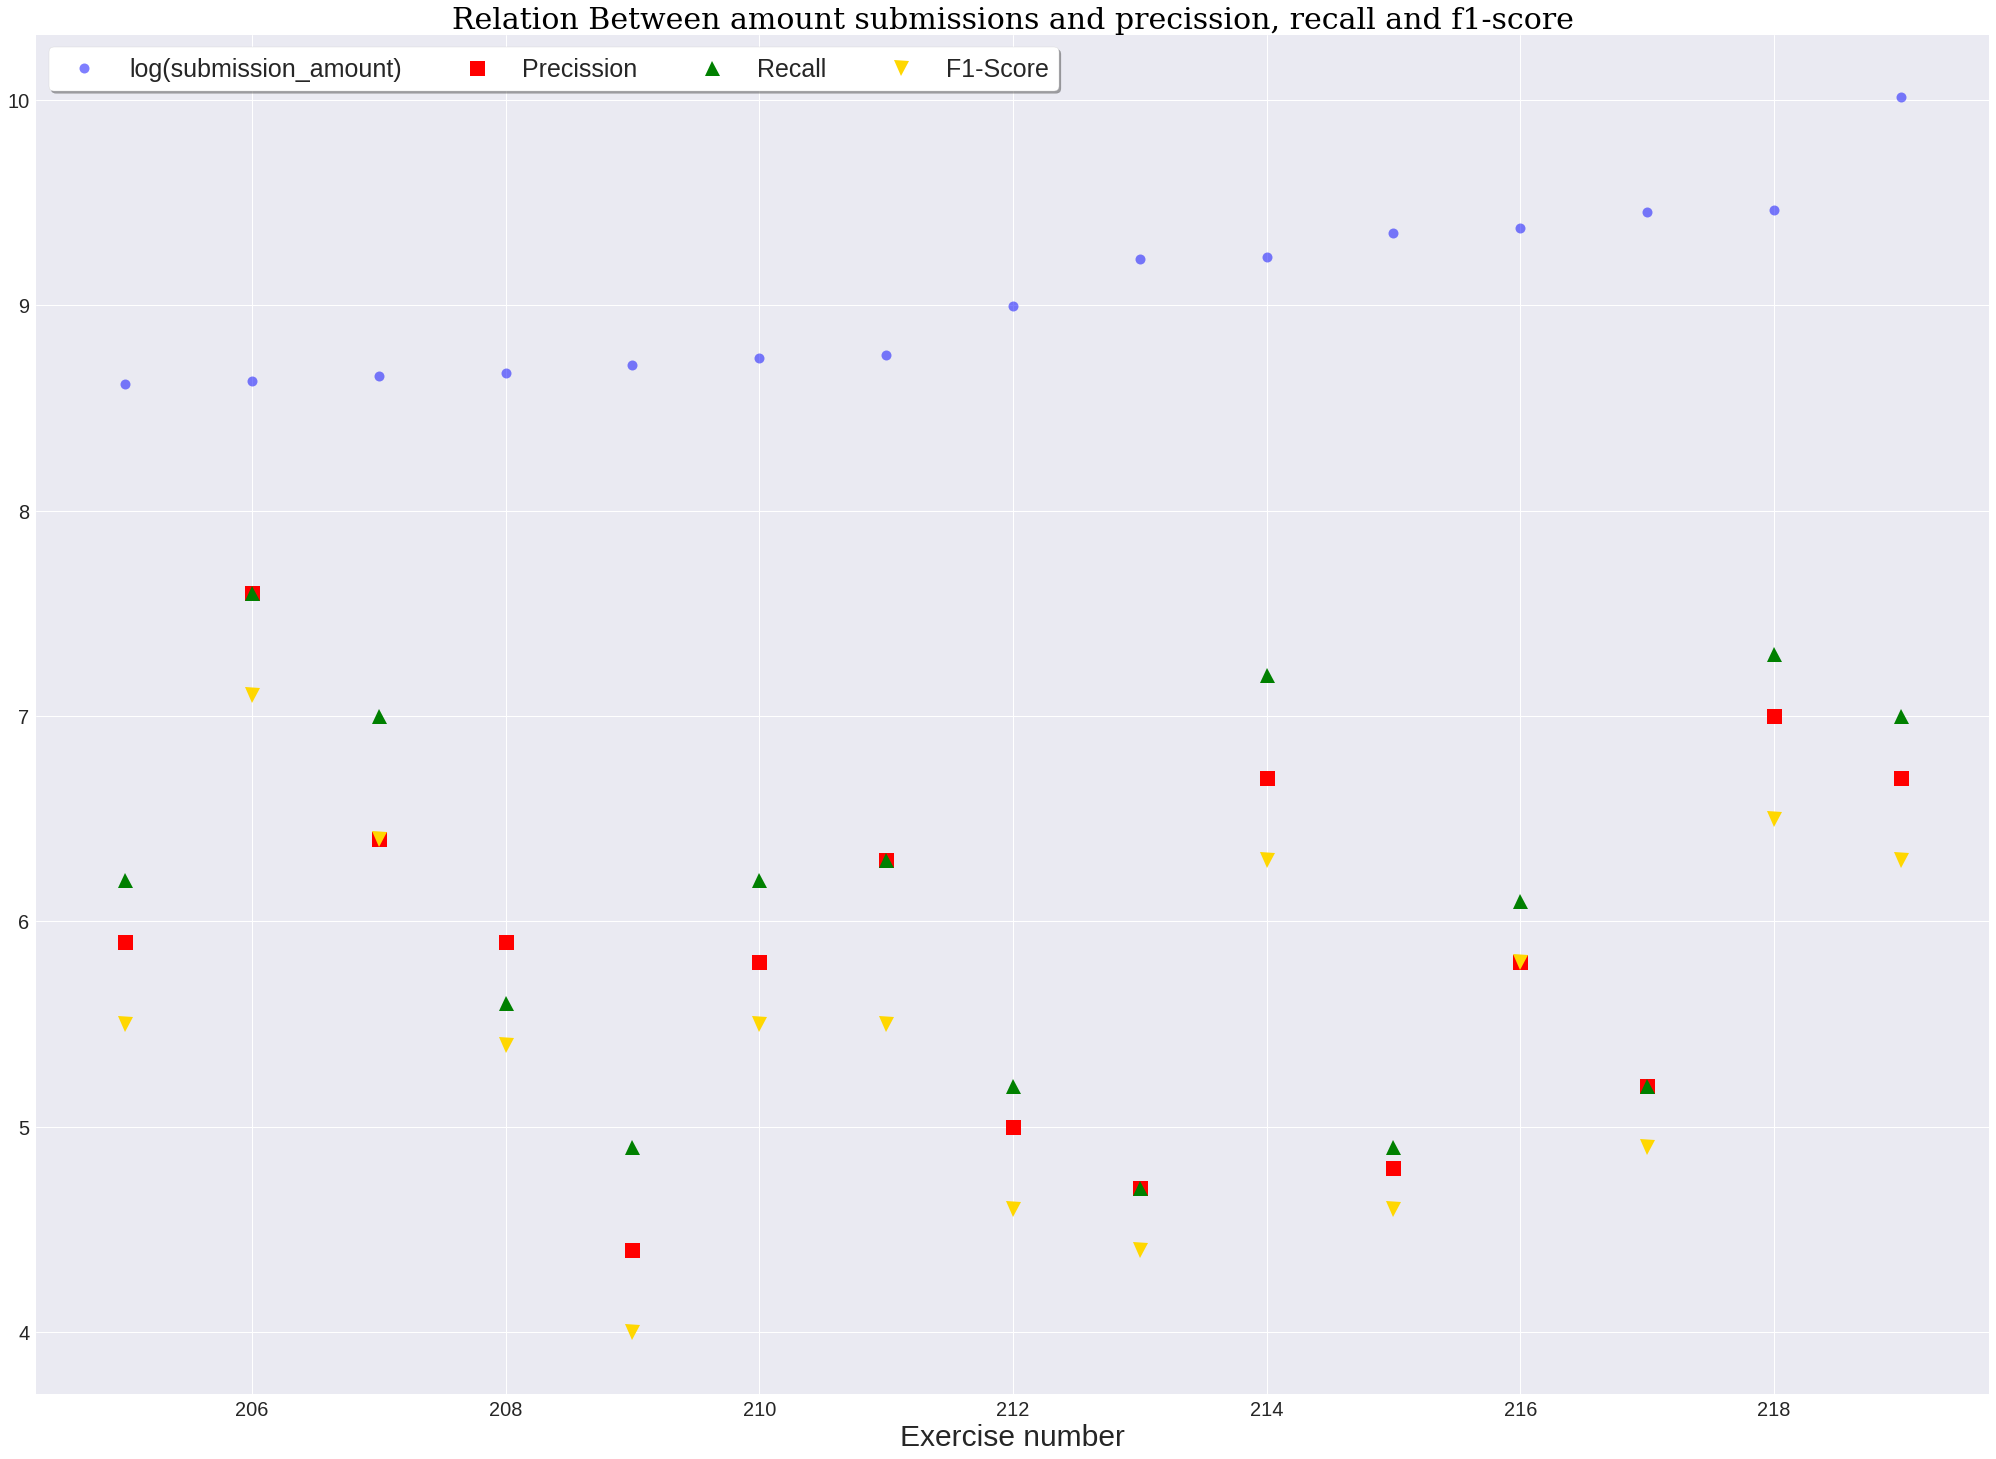

In [15]:
min_ex = 204
max_ex = 219 
font = {'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 30,
        }


font_anota = {'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 16,
        }



# Create plots with pre-defined labels.
fig, ax = plt.subplots()

fig_size = plt.rcParams["figure.figsize"]
 
fig_size[0] = 35
fig_size[1] = 25
plt.rcParams["figure.figsize"] = fig_size

ax.set_title('Relation Between amount submissions and precission, recall and f1-score', fontdict=font)
ax.plot(lr_short.index[min_ex:max_ex], lr_short.iloc[min_ex:max_ex,]['submission_amount_log'],'.', color='b', label='log(submission_amount)', markersize=20, alpha=0.5)
ax.plot(lr_short.index[min_ex:max_ex], lr_short.iloc[min_ex:max_ex,]['precision'].astype(float),'s',  color='r', label='Precission',  markersize=15,)
ax.plot(lr_short.index[min_ex:max_ex], lr_short.iloc[min_ex:max_ex,]['recall'].astype(float),'^',  color='green', label='Recall',  markersize=15,)
ax.plot(lr_short.index[min_ex:max_ex], lr_short.iloc[min_ex:max_ex,]['f1-score'].astype(float),'v',  color='gold', label='F1-Score',  markersize=15,)

legend = ax.legend(
    loc='upper left', shadow=True, fontsize='x-large', fancybox=True,
    prop={'size': 25}, frameon=True, ncol=4, markerscale=1)
legend.get_frame().set_facecolor('white')
plt.ylabel('',fontsize=30)
plt.xlabel('Exercise number', fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.show()



In [1]:
fig, axes = plt.subplots(nrows=2, ncols=2)

font = {'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 20,
        }

ax0, ax1, ax2, ax3 = axes.flatten()
ax0.set_title('Exercises 0 to 55', fontdict=font)
ax1.set_title('Exercises 56 to 110', fontdict=font)
ax2.set_title('Exercises 111 to 166', fontdict=font)
ax3.set_title('Exercises 167 to 219', fontdict=font)

ax0.plot(lr_short.index[:55], lr_short.iloc[:55,]['submission_amount_log'],'.', color='b', label='log(submission_amount)', markersize=15, alpha=0.5)
ax0.plot(lr_short.index[:55], lr_short.iloc[:55,]['precision'].astype(float),'s',  color='r', label='Precission',  markersize=10,)
ax0.plot(lr_short.index[:55], lr_short.iloc[:55,]['recall'].astype(float),'^',  color='green', label='Recall',  markersize=10,)
ax0.plot(lr_short.index[:55], lr_short.iloc[:55,]['f1-score'].astype(float),'v',  color='gold', label='F1-Score',  markersize=10,)


ax1.plot(lr_short.index[56:110], lr_short.iloc[56:110,]['submission_amount_log'],'.', color='b', label='log(submission_amount)', markersize=15, alpha=0.5)
ax1.plot(lr_short.index[56:110], lr_short.iloc[56:110,]['precision'].astype(float),'s',  color='r', label='Precission',  markersize=10,)
ax1.plot(lr_short.index[56:110], lr_short.iloc[56:110,]['recall'].astype(float),'^',  color='green', label='Recall',  markersize=10,)
ax1.plot(lr_short.index[56:110], lr_short.iloc[56:110,]['f1-score'].astype(float),'v',  color='gold', label='F1-Score',  markersize=10,)

ax2.plot(lr_short.index[111:166], lr_short.iloc[111:166,]['submission_amount_log'],'.', color='b', label='log(submission_amount)', markersize=15, alpha=0.5)
ax2.plot(lr_short.index[111:166], lr_short.iloc[111:166,]['precision'].astype(float),'s',  color='r', label='Precission',  markersize=10,)
ax2.plot(lr_short.index[111:166], lr_short.iloc[111:166,]['recall'].astype(float),'^',  color='green', label='Recall',  markersize=10,)
ax2.plot(lr_short.index[111:166], lr_short.iloc[111:166,]['f1-score'].astype(float),'v',  color='gold', label='F1-Score',  markersize=10,)

ax3.plot(lr_short.index[167:], lr_short.iloc[167:,]['submission_amount_log'],'.', color='b', label='log(submission_amount)', markersize=15, alpha=0.5)
ax3.plot(lr_short.index[167:], lr_short.iloc[167:,]['precision'].astype(float),'s',  color='r', label='Precission',  markersize=10,)
ax3.plot(lr_short.index[167:], lr_short.iloc[167:,]['recall'].astype(float),'^',  color='green', label='Recall',  markersize=10,)
ax3.plot(lr_short.index[167:], lr_short.iloc[167:,]['f1-score'].astype(float),'v',  color='gold', label='F1-Score',  markersize=10,)

legend = ax0.legend(
    loc='upper left', shadow=True, fontsize='large', fancybox=True,
    prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
legend.get_frame().set_facecolor('white')

legend = ax1.legend(
    loc='upper left', shadow=True, fontsize='large', fancybox=True,
    prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
legend.get_frame().set_facecolor('white')

legend = ax2.legend(
    loc='lower left', shadow=True, fontsize='large', fancybox=True,
    prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
legend.get_frame().set_facecolor('white')

legend = ax3.legend(
    loc='lower left', shadow=True, fontsize='large', fancybox=True,
    prop={'size': 10}, frameon=True, ncol=1, markerscale=1)
legend.get_frame().set_facecolor('white')


ax0.tick_params(axis='x', labelsize=15)
ax0.tick_params(axis='y', labelsize=15)

ax0.set_xlabel('Exercise Number', fontsize=15)
ax1.set_xlabel('Exercise Number', fontsize=15)
ax2.set_xlabel('Exercise Number', fontsize=15)
ax3.set_xlabel('Exercise Number', fontsize=15)

ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)

ax3.tick_params(axis='x', labelsize=15)
ax3.tick_params(axis='y', labelsize=15)


NameError: name 'plt' is not defined